#### importing the required libraries 

In [81]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from keras.regularizers import L1,L2 

#### importing the dataset 

In [2]:
df=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\Multiple CSV\Multiple CSV\6.overlap.csv",header=None)
df.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [3]:
#renaming columns properly
df.columns=["feature_1","feature_2","label"] 
df.head() 

,feature_1,feature_2,label
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


#### checking label counts 

In [4]:
df["label"].value_counts()

label
0    50
1    50
Name: count, dtype: int64

<Axes: >

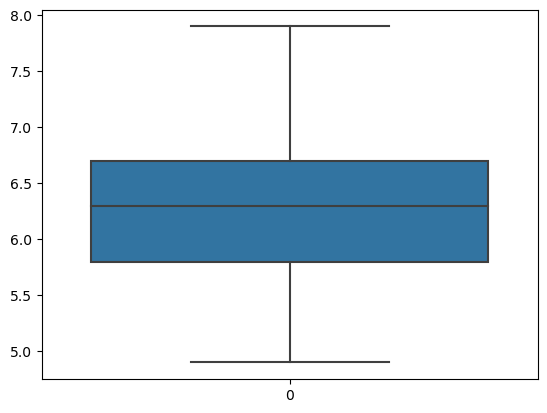

In [5]:
sns.boxplot(df["feature_1"])

<Axes: >

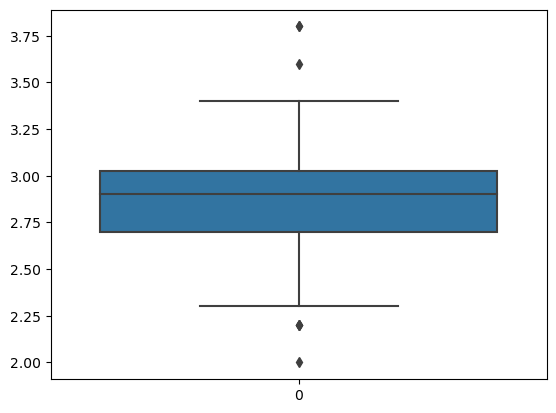

In [6]:
sns.boxplot(df["feature_2"])

<Axes: xlabel='feature_1', ylabel='feature_2'>

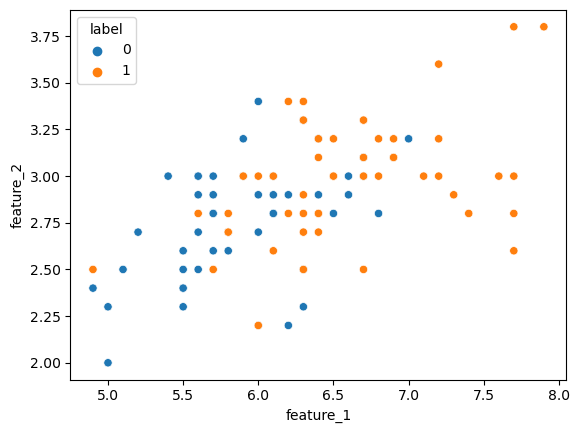

In [7]:
sns.scatterplot(data=df,x="feature_1",y="feature_2",hue="label")

In [8]:
## removing the outlier datapoints
df=df[(df["feature_2"]<3.50)&(df["feature_2"]>2.25)]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  93 non-null     float64
 1   feature_2  93 non-null     float64
 2   label      93 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


#### splitting the data into input and output features as x and y 

In [10]:
## splitting the data into input and output
x=df[["feature_1","feature_2"]]

## typecasting label column as int 
y=df["label"].astype(int)

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

#### splitting the data into train and test 

In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(83, 2) (83,)
(10, 2) (10,)


#### scaling the input features of both X_train,X_test 

In [13]:
scalar=StandardScaler()

### scaling X_train
X_train=scalar.fit_transform(X_train)



## scaling X_test 
X_test=scalar.transform(X_test)

#### building the logical structure 

In [120]:
model=Sequential()
model.add(Dense(12,activation="relu",kernel_regularizer=L1(0.1),input_dim=2))
model.add(Dense(8,activation="relu",kernel_regularizer=L1(0.1)))
model.add(Dense(1,activation="sigmoid"))


In [121]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 12)                36        
                                                                 
 dense_48 (Dense)            (None, 8)                 104       
                                                                 
 dense_49 (Dense)            (None, 1)                 9         
                                                                 
Total params: 149 (596.00 Byte)
Trainable params: 149 (596.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### compiling the model 

In [122]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=10,epochs=30,validation_split=0.1)

Epoch 1/30
8/8 [==============================] - 1s 40ms/step - loss: 4.0020 - accuracy: 0.4865 - val_loss: 3.8654 - val_accuracy: 0.5556
Epoch 2/30
8/8 [==============================] - 0s 9ms/step - loss: 3.9012 - accuracy: 0.4865 - val_loss: 3.7650 - val_accuracy: 0.5556
Epoch 3/30
8/8 [==============================] - 0s 9ms/step - loss: 3.8006 - accuracy: 0.5135 - val_loss: 3.6670 - val_accuracy: 0.6667
Epoch 4/30
8/8 [==============================] - 0s 9ms/step - loss: 3.7022 - accuracy: 0.5270 - val_loss: 3.5718 - val_accuracy: 0.6667
Epoch 5/30
8/8 [==============================] - 0s 12ms/step - loss: 3.6064 - accuracy: 0.5270 - val_loss: 3.4773 - val_accuracy: 0.6667
Epoch 6/30
8/8 [==============================] - 0s 14ms/step - loss: 3.5122 - accuracy: 0.5135 - val_loss: 3.3860 - val_accuracy: 0.6667
Epoch 7/30
8/8 [==============================] - 0s 12ms/step - loss: 3.4207 - accuracy: 0.5000 - val_loss: 3.2977 - val_accuracy: 0.6667
Epoch 8/30
8/8 [==============

#### plotting the train test loss 

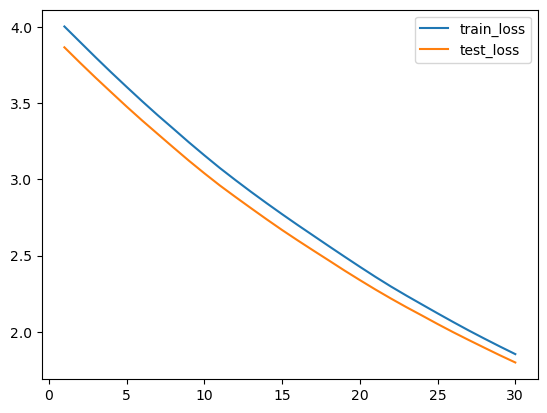

In [123]:
plt.plot(range(1,31),history.history["loss"],label="train_loss")
plt.plot(range(1,31),history.history["val_loss"],label="test_loss") 
plt.legend() 

#### finding the predicted values using model 

In [124]:
predicted=model.predict(X_test)
predicted

1/1 [==============================] - 0s 88ms/step


array([[0.528091  ],
       [0.533782  ],
       [0.5148498 ],
       [0.49926615],
       [0.48474112],
       [0.53081405],
       [0.5009395 ],
       [0.47611758],
       [0.5328976 ],
       [0.49921197]], dtype=float32)

#### converting the predicted probablities to the respective labels

In [125]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

#### evaluating the model 

0.6


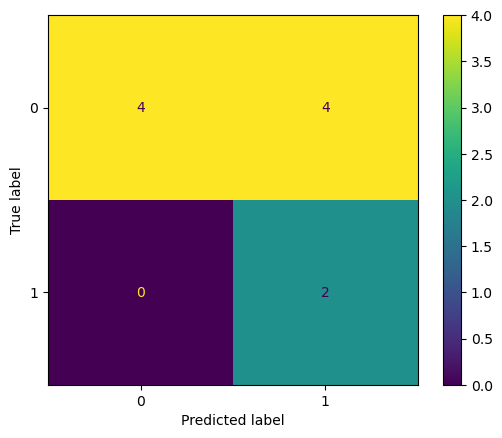

In [126]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### creating the decision surface 

In [127]:
from mlxtend.plotting  import plot_decision_regions


9600/9600 [==============================] - 20s 2ms/step


<Axes: >

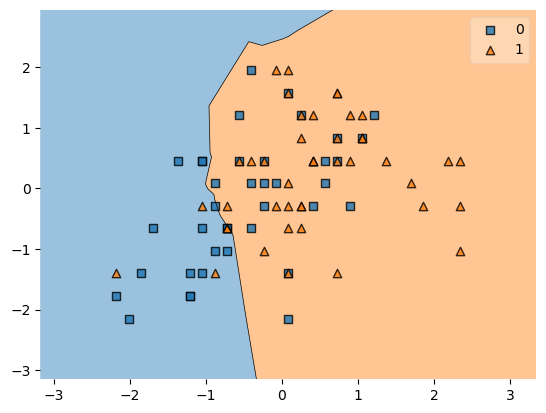

In [128]:
plot_decision_regions(X_train,y_train.values,clf=model)

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

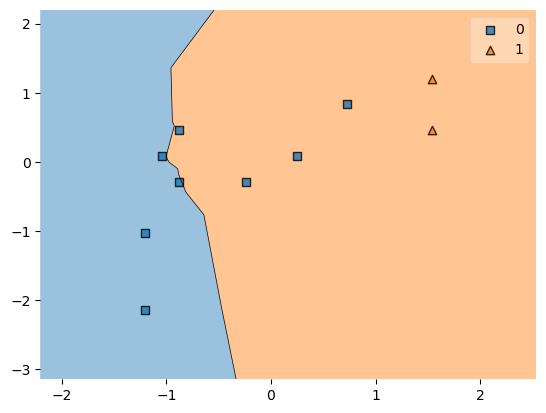

In [129]:
#for test data 
plot_decision_regions(X_test,y_test.values,clf=model)


- This neural network model is showing accuracy of 60 percent
- Since maximum datapoints  are overlapping and in the same two dimensional region it is difficult to the decision surface which can separate all points belonging to one clas from another so there will always be high chance of the point being misscalssified.
- We have used 2 hidden layers.
- In the First Hidden layers we have used 12 neurons,activation function as relu and kernel regularizer L1 as 0.1.
- In the second hidden layers we have used 8 neurons,activation function as relu and kernelregularizer L1 as 0.1.
- In the output layer we have used sigmoid as the activation function. 
- For compiling the model we haved loss as binary cross entropy,optimizer as SGD with batch size of 10 with learning rate of 0.01. 
- No of epochs used for training this model is 30.